# STAT207 Final Project - Spotify Analysis

Subash Shibu, Vikram , Subin Pradeep

## 1. Introduction

Motivation:

We think it can be incredibly useful to analyze the Spotify dataset because it can provide with so much insight in how music is percieved by listeners or fans. For example, we can explore what factors contribute towards making a song popular or show up on the top 100 charts. If a musician has a particular intent with their music an analysis on this dataset can help fulfill that. If the artisit wants their song to be energetic we can create a model to see what varaibles impact that. You could also see what effects the valence of a song which could help an artist make their song more positive or negative. Overall analysis on this dataset can help artists improve their music to appeal more to their listeners. 

Research Questions:

Descriptive Analysis:
For our descriptive anlysis research question we asked, What is the relationship between popularity and valence in this dataset?
This question is interesting as it will help determine whether sad or positive songs tend to be more popular or if there isn’t a clear winner.
I am going to investigate this question by using visualizations such as boxplots to compare measures of center and spread of valence and popularity in the population as well as their correlation. 

For our second question we asked how does the relationship between popularity and valence change depending on the genre of a song? (Rap or Pop)
After investigating just the relationship between positivity (valence) and popularity, by examining the data by grouping pop and rap separately and analyzing summary statistics, we can see if there is an association between genre and popularity or valence.


Inference:

For our inference reasearch question, we would like to determine if we have sufficient evidence to suggest that there is an association between
music genre and danceability of the song in ALL pop and rap songs.

To specifically answer this question, we would like to determine if there is sufficient evidence to suggest that the average danceability of ALL
pop songs from 2011 to 2021 is different from the average danceability of ALL rap songs from 2011 to 2021. 

We will determine this association by conducting a hypothesis test on the difference in sample means between the categorical and numerical variable.

Linear Regression:

We will check if there a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in the sample. I will do this using the R^2 and the linearity condition. I think this is an interesting question to answer because a model that predicts how energetic a song is, has vast applications. Artisits can make their song sound more energetic and appealing to their audience this way.

We would like to determine if there is sufficient evidence to suggest that there is a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in all spotify rap and pop songs. I will run a hypothesis test on the overall model to see if at least one of the slopes is not zero. This is an interesting question to ask because it allows me to assess if this a model that has a linear relationship.

 We would also like to check which explanatory variables have sufficient evidence to suggest linear association with song energy in all spotify rap and pop songs? I will do this by conducting a hypothesis test on each explanatory varaible I chose. This is an interesting question because it allows me to understand which variables have a linear association with energy. That way an artist only has to look at those factors to make their song less or more energetic.

Logistic Regression:

For this section, our group wanted to first explore the relationship between genre and 4 explanatory variables we selected. The 4 explanatory variables we selected were speechiness, danceability, acousticness, and liveness. 

Our goal with this question was to build a parsimonious model using only the variables we should include. We chose these 4 variables beause we assumed it would fit the most in predicting 

Dataset Information:
This data was collected through the spotify api, at https://developer.spotify.com/documentation/web-api/ where we scraped a psuedo-random sample of songs. This was collected by randomizing a search query which searched songs through a range of 2011-2021 with random starting letters by genre. We collected 50 “random” samples from the rap genre and 50 from the pop genre in order to analyze the data and compare by genre as well.

The dataset’s columns measure various song information ranging from track information to sound information. The columns are as follows:

Track ID- a unique ID for every track

Track Name

Artist ID- a unique ID for every artist

Artist Name

Album ID- a unique ID for every album

Album name

Release date

Popularity- A metric made by spotify from 0-100 ranking a songs popularity

Tempo- The tempo of the song

Danceability- How suitable a track is for dancing, 0-1

Energy- the song’s intensity and activity from 0-1

Loudness- how loud a song is in decibels

Key- what musical key the song is in

Acousticness- 0-1 confidence in how acoustic the song is

Instrumentalness- Whether or not the track has vocals or not

Mode- Modality of a track

Valence- the positivity of a track 0-1

Genre- The genre of the song

Speechiness- measure of how verbose a song is 0-1

Liveness- whether or not a song was performed live


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.stats import t, norm, f
 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv('songs3.csv')
df2 = pd.read_csv('pop_songs.csv')
print(df.dtypes)
df['Genre'] = 'Rap'
df2['Genre'] = 'Pop'
df

track_id             object
track_name           object
artist_id            object
artist_name          object
album_id             object
album_name           object
release_date         object
popularity            int64
tempo               float64
danceability        float64
energy              float64
key                   int64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
mode                float64
speechiness         float64
type                 object
time_signature      float64
dtype: object


,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,danceability,...,loudness,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,Genre
0,3nvq7dUw9ISmhtrjBrSfOE,hellboy,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,08VSO0uoR2SaKrxcFoJ235,HELLBOY,2016,65,135.982,0.598,...,-6.588,0.015200,0.000000,0.3190,0.1220,0.0,0.0540,audio_features,5.0,Rap
1,6GivWRmlYtefJr28jev6e0,Leray,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,0tKX7BLXiiRgXUKYdJzjEz,A Love Letter To You 4,2019-11-22,70,132.847,0.774,...,-12.233,0.789000,0.001030,0.1090,0.3690,1.0,0.0870,audio_features,4.0,Rap
2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,0.653,...,-8.444,0.330000,0.000000,0.1430,0.4100,1.0,0.0555,audio_features,4.0,Rap
3,3BYIzNZ3t9lRQCACXSMLrT,Venetia,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,2020-03-06,62,142.933,0.775,...,-4.139,0.162000,0.000000,0.1480,0.5620,1.0,0.1750,audio_features,4.0,Rap
4,496GZe7MxLloHgUQTmY2Ch,$Outh $Ide $Uicide,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,7gMzKwKAsbooGeKgDlX2TL,High Tide in the Snake's Nest,2015-06-15,71,109.993,0.797,...,-6.286,0.005380,0.438000,0.0728,0.0478,1.0,0.0832,audio_features,4.0,Rap
5,2v5JTeM6hSmi5wWy7jiwrI,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,4BQUTZlR3OMrBorJo1ahoY,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,2019-01-31,66,129.939,0.741,...,-3.568,0.150000,0.000000,0.1740,0.9260,0.0,0.0381,audio_features,4.0,Rap
6,7vxLj7MREliG5i5vSnqSVr,Body,57LYzLEk2LcFghVwuWbcuS,Summer Walker,1qgJNWnPIeK9rx7hF8JCPK,Over It,2019-10-04,70,137.875,0.555,...,-6.099,0.250000,0.000000,0.2830,0.3390,0.0,0.1670,audio_features,4.0,Rap
7,76u3GyVNpci1akni11Cfw9,Hear Me Now,0CEFCo8288kQU7mJi25s6E,Hollywood Undead,00LaE2YT3EkPBED8vLyFvp,American Tragedy (Deluxe Edition),2011,58,85.989,0.457,...,-3.794,0.000200,0.000102,0.8880,0.3590,1.0,0.0348,audio_features,4.0,Rap
8,3BUWNzPWz2mDbptZmGEXpB,Let It All Work Out,55Aa2cqylxrFIXC767Z865,Lil Wayne,50yFYgKdwJANZ5O9MIbMkg,Tha Carter V,2018-09-28,62,135.872,0.551,...,-6.862,0.021800,0.000000,0.3020,0.4380,1.0,0.1630,audio_features,4.0,Rap
9,1F9kEuwT29fgqlovIclu81,love race (feat. Kellin Quinn),6TIYQ3jFPwQSRmorSezPxX,Machine Gun Kelly,3q4wUTOTsRASPClG5Fg3tk,love race (feat. Kellin Quinn),2021-04-29,64,95.906,0.517,...,-4.054,0.005810,0.000000,0.2140,0.4290,1.0,0.0521,audio_features,4.0,Rap


In [ ]:
df_songs = df.append(df2).reset_index()
df_songs
years = []
for i in df_songs.release_date:
    release_date = i.split('-')
    years.append(int(release_date[0]))

df_songs['release_year'] = years
df_songs

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,acousticness,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year
0,0,3nvq7dUw9ISmhtrjBrSfOE,hellboy,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,08VSO0uoR2SaKrxcFoJ235,HELLBOY,2016,65,135.982,...,0.01520,0.00000,0.3190,0.1220,0.0,0.0540,audio_features,5.0,Rap,2016
1,1,6GivWRmlYtefJr28jev6e0,Leray,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,0tKX7BLXiiRgXUKYdJzjEz,A Love Letter To You 4,2019-11-22,70,132.847,...,0.78900,0.00103,0.1090,0.3690,1.0,0.0870,audio_features,4.0,Rap,2019
2,2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,...,0.33000,0.00000,0.1430,0.4100,1.0,0.0555,audio_features,4.0,Rap,2015
3,3,3BYIzNZ3t9lRQCACXSMLrT,Venetia,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,2020-03-06,62,142.933,...,0.16200,0.00000,0.1480,0.5620,1.0,0.1750,audio_features,4.0,Rap,2020
4,4,496GZe7MxLloHgUQTmY2Ch,$Outh $Ide $Uicide,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,7gMzKwKAsbooGeKgDlX2TL,High Tide in the Snake's Nest,2015-06-15,71,109.993,...,0.00538,0.43800,0.0728,0.0478,1.0,0.0832,audio_features,4.0,Rap,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,2Nz6aF1umHh5Et6I5H581L,Hooked On A Feeling,0UpuH5U4nZ3UGGUJi0Zfbp,Blue Swede,12UILuDVbIIjLZhcRBNcOJ,Hooked On A Feeling - 40th Anniversary Collection,2014-09-30,65,118.208,...,0.26100,0.00000,0.3000,0.9330,1.0,0.0805,audio_features,4.0,Pop,2014
96,46,14kYOiFVPb7E7NfFbqhdln,goodnight n go,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,3tx8gQqWbGwqIGZHqDNrGe,Sweetener,2018-08-17,69,110.963,...,0.02170,0.00000,0.0730,0.2400,1.0,0.0395,audio_features,4.0,Pop,2018
97,47,76VtA90NKurNqaQpV126Ue,Pour It Up,5pKCCKE2ajJHZ9KAiaK11H,Rihanna,4eddbruVtOqw8khwxSH6H2,Unapologetic (Deluxe),2012-12-11,67,134.002,...,0.02540,0.00000,0.0901,0.3900,1.0,0.0419,audio_features,4.0,Pop,2012
98,48,5dMKsEQSlR2ITYpScl7UMd,Remember This,6fOMl44jA4Sp5b9PpYCkzz,NF,1KOmHyNLuOe5YrPhD3Juuf,Perception,2017-10-06,67,79.196,...,0.43400,0.00000,0.1090,0.2780,1.0,0.2060,audio_features,4.0,Pop,2017


## 2. Descriptive Analytics

Research Questions:
What is the relationship between Popularity and Valence in this dataset?

Furthermore, how does this relationship change based on genre?

I selected the valence, popularity, and genre variables in order to analyze this dataset. The first research question I wanted to answer was- What is the relationship between popularity and valence in this dataset? Valence is a measure of the positivity or happiness of a track ranging from 0-1. Songs with a high valence are happier and tend to be more positive, and songs with low valence are more negative. I then wanted to analyze the impact of Genre on this relationship in order to see if a song's genre changes the likelihood of having a high or low valence. My second research question is "How does the relationship between popularity and valence change depending on the genre of a song (Rap or Pop)". By splitting the data by the categorical variable Genre, we can see if the relationship changes between popularity and valence.

First I analyzed the overall dataset, and checked the relative distributions of the two numeric variables. Between the two variables, there seems to be very little association between a song's positivity and its popularity. With a correlation or slope of just 0.042816 for the relationship between these two variables, it seems that for the entire dataset the effect of valence on popularity is minimal. 

In [ ]:
df_songs.describe()[['valence','popularity']]

,valence,popularity
count,100.000000,100.000000
mean,0.463168,63.430000
std,0.224383,10.070715
min,0.046700,30.000000
25%,0.284000,60.000000
50%,0.437000,65.000000
75%,0.621500,70.000000
max,0.960000,83.000000


,valence,popularity
valence,1.000000,0.042816
popularity,0.042816,1.000000


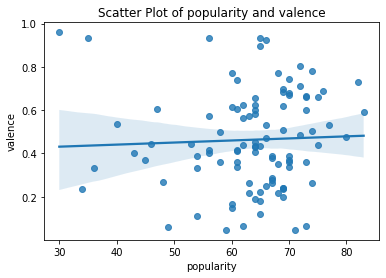

In [ ]:
scatter = sns.regplot(x = 'popularity', y = 'valence', data= df_songs)
plt.title("Scatter Plot of popularity and valence")
scatter
df_songs[['valence','popularity']].corr()


Analyzing the Relationship between valence and popularity:
1. Strength (correlation)- The correlation is small being only 0.042816
2. Shape- The histogram of popularity is unimodal and relatively normal but skewed left with lower popularity scores skewing the data, the mean is less than the median since the dataset is skewed left. The histogram for valence is unimodal with a more uniform distribution and slightly skewed right. The mean is greater than the median for valence due to the right skewed nature of the data.
3. Direction- The regression line has a slightly positive slope, meaning the linear relationship between the two variables is small but as one increases the other one does as well.
4. Outliers - There are 6 low outliers in the Popularity boxplot, and none for valence. The valence histogram shows that the frequencies are fairly similar for most of the bins, and having a range from 0-1 combines to have no outliers for this variable.
5. Slope and intercept of best fit line- 

Text(0.5, 1.0, 'Histogram of valence scores for Rap & Pop Songs')

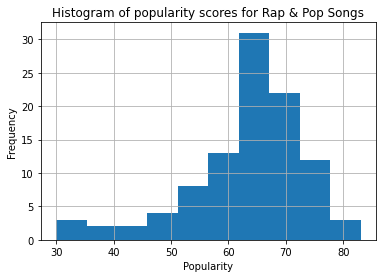

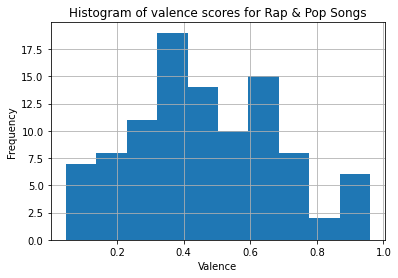

In [ ]:
df_songs.hist('popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of popularity scores for Rap & Pop Songs')
df_songs.hist('valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.title('Histogram of valence scores for Rap & Pop Songs')

In [ ]:
print(df_songs.valence.mean())
print(df_songs.valence.median())

0.463168
0.437


In [ ]:
print(df_songs.popularity.mean())
print(df_songs.popularity.median())

63.43
65.0


Text(0.5, 1.0, 'Boxplot of Rap & Pop Song Popularities')

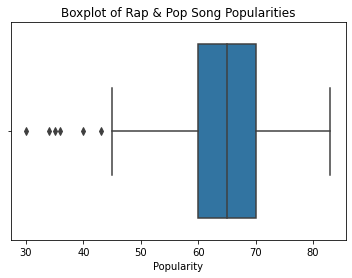

In [ ]:
sns.boxplot(x = df_songs['popularity'])
plt.xlabel('Popularity')
plt.title('Boxplot of Rap & Pop Song Popularities')

Text(0.5, 1.0, 'Boxplot of Rap & Pop Song Valences')

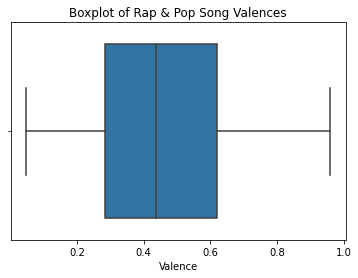

In [ ]:
sns.boxplot(x = df_songs['valence'])
plt.xlabel('Valence')
plt.title('Boxplot of Rap & Pop Song Valences')

Research question 2: "How does Genre affect the relationship between popularity and valence?
In order to explore the relationship while adding a third variable, I split the dataset into two subsets one with the categorical variable of genre == rap and genre == pop. When plotting this data and using hue to show the different Genres, we can see that the linear relationship between valence and popularity for pop is greater than for rap. When looking at the correlation matrix, the correlation between population and valence for pop songs is 0.1287 versus 0.008301 for rap songs.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


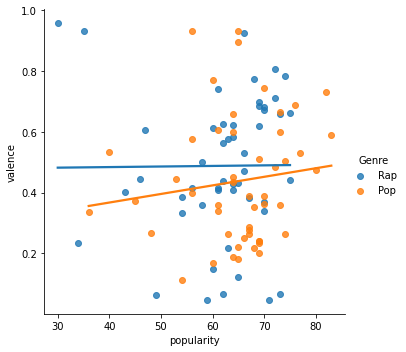

In [ ]:
sns.lmplot('popularity', 'valence', hue = 'Genre', data = df_songs, ci = None)

In [ ]:
df_songs[['Genre','popularity','valence']].groupby('Genre').corr()

popularity   valence
Genre                                 
Pop   popularity    1.000000  0.128731
      valence       0.128731  1.000000
Rap   popularity    1.000000  0.008301
      valence       0.008301  1.000000

We can see that the distributions for popularity are almost the same for both rap and pop individually.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f205ef8d160>]],
      dtype=object)

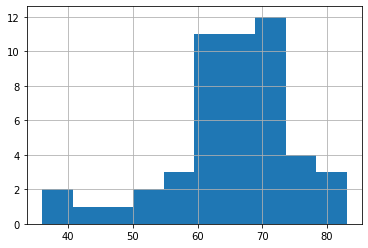

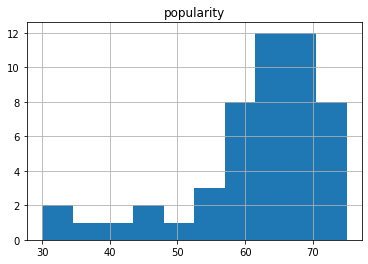

In [ ]:
df_songs['Popular'] = 1*(df_songs['popularity'] > 65)
df_pop = df_songs[ df_songs.Genre == 'Pop']
df_rap = df_songs[ df_songs.Genre == 'Rap']
df_pop.popularity.hist()
df_rap.hist('popularity')

The histograms for valence by pop and rap music are very different.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f205eedda00>]],
      dtype=object)

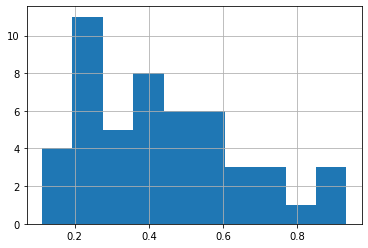

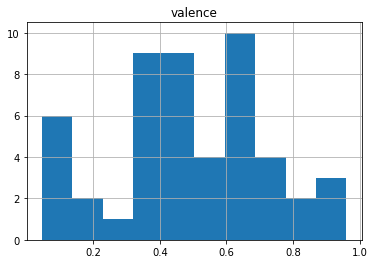

In [ ]:
df_pop.valence.hist()
df_rap.hist('valence')

When comparing summary statistics, we can see that the mean valence for pop songs is 0.438 versus 0.488 for rap songs, and their medians (which are better summary statistics since the data is skewed) have a larger difference, with pop's median valence being 0.389, compared to 0.458 for rap. The IQR (the range in which the middle 50% of the data lies) is larger for pop songs as well indicating more spread. I used IQR instead of standard deviation due to the skewed nature of the data.

In [ ]:
print(df_pop.valence.median())
df_rap.valence.median()

0.389


0.45799999999999996

In [ ]:
print(df_pop.valence.mean())
df_rap.valence.mean()

0.4380799999999999


0.488256

In [ ]:
iqr_pop = df_pop.valence.quantile(q = 0.75) - df_pop.valence.quantile(q = 0.25)
print(iqr_pop)
iqr_rap = df_rap.valence.quantile(q = 0.75) - df_rap.valence.quantile(q = 0.25)
iqr_rap

0.32275


0.28925

By comparing the two side by side boxplots, we can see that there is a slight association between Genre and valence since the median value in the boxplot is lower for pop than rap. There is a decent amount of overlap so the association is not strong.

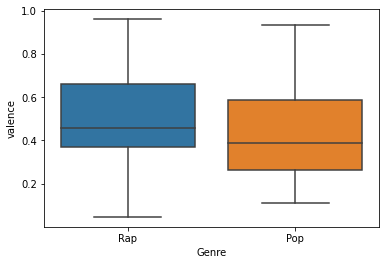

In [ ]:
sns.boxplot(x = 'Genre', y = 'valence', data = df_songs)

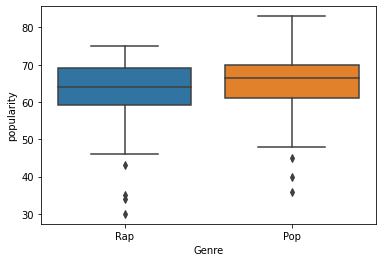

In [ ]:
sns.boxplot(x = 'Genre', y = 'popularity', data = df_songs)

Text(0.5, 1.0, 'Boxplot of Rap & Pop songs ')

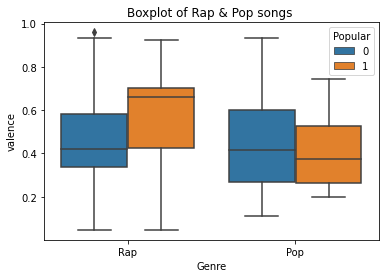

In [ ]:
sns.boxplot(x= 'Genre', y = 'valence', hue = 'Popular', data = df_songs)
plt.title('Boxplot of Rap & Pop songs ')

In [ ]:
print("Proportion of songs that are popular in the dataset") 
print(len(df_songs[df_songs.Popular == 1]) / len(df_songs))
print("Proportion of songs in df_rap that are popular")
print(len(df_rap[df_rap.Popular == 1]) / len(df_rap))
print("Proportion of songs in df_pop that are popular")
print(len(df_pop[df_pop.Popular == 1]) / len(df_pop))

Proportion of songs that are popular in the dataset
0.46
Proportion of songs in df_rap that are popular
0.4
Proportion of songs in df_pop that are popular
0.52


I created a new column called popular in order to see the proportion of songs that are popular relative to the dataset. Since the median popularity score for the dataset was 65, I mapped a 1 in if the song was above the median value in popularity, 0 if it was <= the median. The boxplot above shows that for rap, the median valence is much higher for popular rap songs than less popular ones and the iqr is higher as well. On the other hand, the median and iqr for pop songs are relatively similar for popular and less popular songs. I turned popularity into a 0-1 categorical variable in order to visualize this difference better through a boxplot. We also can see that df_pop has 52% of its songs > than the median popularity score, compared to 46% for df_rap.

## 3. Inference

For our inference reasearch question, we would like to determine if we have sufficient evidence to suggest that there is an association between
music genre and danceability of the song in ALL pop and rap songs.

To specifically answer this question, we would like to determine if there is sufficient evidence to suggest that the average danceability of ALL
pop songs from 2011 to 2021 is different from the average danceability of ALL rap songs from 2011 to 2021. 

For this research question, we chose to explore the danceability and genre variables because we wanted to know if the

**Hypothesis:**

Ho: µ1 - µ2 = 0

Ha: µ1 - µ2 != 0

µ1 = mean danceability value for pop songs

µ2 = mean danceability value for rap songs

**Pop songs and Rap songs Exploration:**

In [ ]:
df_songs.head()

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular
0,0,3nvq7dUw9ISmhtrjBrSfOE,hellboy,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,08VSO0uoR2SaKrxcFoJ235,HELLBOY,2016,65,135.982,...,0.00000,0.3190,0.1220,0.0,0.0540,audio_features,5.0,Rap,2016,0
1,1,6GivWRmlYtefJr28jev6e0,Leray,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,0tKX7BLXiiRgXUKYdJzjEz,A Love Letter To You 4,2019-11-22,70,132.847,...,0.00103,0.1090,0.3690,1.0,0.0870,audio_features,4.0,Rap,2019,1
2,2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,...,0.00000,0.1430,0.4100,1.0,0.0555,audio_features,4.0,Rap,2015,0
3,3,3BYIzNZ3t9lRQCACXSMLrT,Venetia,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,2020-03-06,62,142.933,...,0.00000,0.1480,0.5620,1.0,0.1750,audio_features,4.0,Rap,2020,0
4,4,496GZe7MxLloHgUQTmY2Ch,$Outh $Ide $Uicide,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,7gMzKwKAsbooGeKgDlX2TL,High Tide in the Snake's Nest,2015-06-15,71,109.993,...,0.43800,0.0728,0.0478,1.0,0.0832,audio_features,4.0,Rap,2015,1


In [ ]:
inf_popsongs = df_songs[df_songs.Genre == "Pop"]
inf_popsongs.head()

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular
50,0,3koAwrM1RO0TGMeQJ3qt9J,$10,2kMzxA8edU05hvMFU493zJ,Good Morning,7yM5Ngseisc5GlHyaWd0Cp,Prize//Reward,2018-05-11,65,120.969,...,0.203000,0.1190,0.896,1.0,0.0314,audio_features,4.0,Pop,2018,0
51,1,0P6AWOA4LG1XOctzaVu5tt,The Weekend - Funk Wav Remix,7tYKF4w9nC0nq9CsPZTHyP,SZA,5enEsi887wD3qGoMCK4jLr,The Weekend (Funk Wav Remix),2017-12-15,73,101.925,...,0.000000,0.1260,0.667,1.0,0.0585,audio_features,4.0,Pop,2017,1
52,2,1dNIEtp7AY3oDAKCGg2XkH,Something Just Like This,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,7IzpJkWQqgz1BTutQvSitX,Something Just Like This,2017-02-22,74,102.996,...,0.000025,0.1740,0.505,0.0,0.0362,audio_features,4.0,Pop,2017,1
53,3,3WD91HQDBIavSapet3ZpjG,Video Games,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),2012-01-01,65,122.053,...,0.000000,0.0887,0.181,0.0,0.0298,audio_features,4.0,Pop,2012,0
54,4,5HQVUIKwCEXpe7JIHyY734,"Young, Wild & Free (feat. Bruno Mars)",7hJcb9fa4alzcOq3EaNPoG,Snoop Dogg,11Bkx3E99vf0IlYPND61LJ,"Young, Wild & Free (feat. Bruno Mars)",2011-10-11,77,95.078,...,0.000000,0.1150,0.531,1.0,0.1370,audio_features,4.0,Pop,2011,1


In [ ]:
inf_rapsongs = df_songs[df_songs.Genre == "Rap"]
inf_rapsongs.head()

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,instrumentalness,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular
0,0,3nvq7dUw9ISmhtrjBrSfOE,hellboy,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,08VSO0uoR2SaKrxcFoJ235,HELLBOY,2016,65,135.982,...,0.00000,0.3190,0.1220,0.0,0.0540,audio_features,5.0,Rap,2016,0
1,1,6GivWRmlYtefJr28jev6e0,Leray,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,0tKX7BLXiiRgXUKYdJzjEz,A Love Letter To You 4,2019-11-22,70,132.847,...,0.00103,0.1090,0.3690,1.0,0.0870,audio_features,4.0,Rap,2019,1
2,2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,...,0.00000,0.1430,0.4100,1.0,0.0555,audio_features,4.0,Rap,2015,0
3,3,3BYIzNZ3t9lRQCACXSMLrT,Venetia,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,2020-03-06,62,142.933,...,0.00000,0.1480,0.5620,1.0,0.1750,audio_features,4.0,Rap,2020,0
4,4,496GZe7MxLloHgUQTmY2Ch,$Outh $Ide $Uicide,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,7gMzKwKAsbooGeKgDlX2TL,High Tide in the Snake's Nest,2015-06-15,71,109.993,...,0.43800,0.0728,0.0478,1.0,0.0832,audio_features,4.0,Rap,2015,1


In [ ]:
inf_psongsmean = inf_popsongs.danceability.mean()
inf_psongsmean

0.58492

In [ ]:
inf_psongstd = inf_popsongs.danceability.std()
inf_psongstd

0.14901360573409916

In [ ]:
n_psong = inf_popsongs.shape[0]
n_psong

50

In [ ]:
inf_rsongsmean = inf_rapsongs.danceability.mean()
inf_rsongsmean

0.70324

In [ ]:
inf_rsongstd = inf_rapsongs.danceability.std()
inf_rsongstd

0.12575235787135

In [ ]:
n_rsong= inf_rapsongs.shape[0]
n_rsong

50

**Sampling Distributions:**

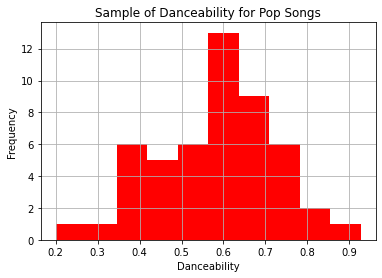

In [ ]:
inf_popsongs.danceability.hist(color='red')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Sample of Danceability for Pop Songs')
plt.show()

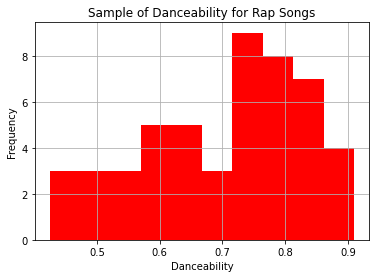

In [ ]:
inf_rapsongs.danceability.hist(color='red')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Sample of Danceability for Rap Songs')
plt.show()

**Distributions Conclusion:**

Neither of the two histograms indicate a normal distribution since both are skewed to the left and not unimodal.

**Conditions**

1. The sample of pop songs and rap songs are randomly selected from the population of all pop and rap songs from 2011 to 2021. 
2. The sample size for pop songs and rap songs is <10% of the population of all pop songs and rap songs from 2011 to 2021.
3. The sample sizes for pop songs and rap songs is >30. 
4. The samples of pop songs and rap songs are randomly selected from the population of all pop and rap songs made from 2011 to 2021. 

Because the Central Limit theorem conditions for sample mean differences are met, we are allowed to conduct inference on µ1 - µ2. 

**Calculate the test statistic score for this hypothesis test:**

In [ ]:
test_stat = ((inf_psongsmean - inf_rsongsmean) - 0)/np.sqrt((inf_psongstd**2)/n_psong +  
                                                         (inf_rsongstd**2)/n_rsong)
test_stat

-4.290861271832192

**Calculate the p-value for this hypothesis test:**

In [ ]:
p_val = 2*(1-t.cdf(np.abs(test_stat), df=49))
p_val.round(4)

0.0001

**Conclusion with a p-value:**

Because our p-value is less than the significance level (0.001 < 0.01), we must reject the null hypothesis. Thus there is sufficient evidence to suggest that
the average danceability of all pop songs from 2011-2021 is different from the average danceability of all rap songs from 2011-2021.

Thus we have sufficient evidence to suggest that there is an association between musical genre and danceability for all pop and rap songs from 2011 to 2021.

**Constuct a 99% Confidence Interval:**

In [ ]:
c_val = t.ppf(0.995, df = 49)
c_val

2.67995197363155

In [ ]:
cl_lower= (inf_psongsmean-inf_rsongsmean)-c_val*np.sqrt((inf_psongstd**2)/n_psong + (inf_rsongstd**2)/n_rsong)

cl_upper= (inf_psongsmean-inf_rsongsmean)+c_val*np.sqrt((inf_psongstd**2)/n_psong + (inf_rsongstd**2)/n_rsong)
 
print('99% Confidence Interval:', cl_lower, cl_upper)

99% Confidence Interval: -0.19221936365495385 -0.04442063634504613



**Confidence Interval in Words**

We are 99% confident that the difference between the average danceability of all pop songs from 2011-2021 and the average daceability of
all rap songs from 2011-2021 is between -0.192 and -0.044.

**Conclusion with Confidence Interval:**

Since the null value µ1 - µ2 = 0 is not inside the confidence interval, we must reject the null hypothesis. Thus there is sufficient evidence to suggest that
the average danceability of all pop songs from 2011-2021 is different from the average danceability of all rap songs from 2011-2021.

## 4. Linear Regression

Research Questions

1. We will check if there a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in the sample.

2. We would like to determine if there is sufficient evidence to suggest that there is a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in all spotify rap and pop songs.

3. We would also like to check which explanatory variables have sufficient evidence to suggest linear association with song energy in all spotify rap and pop songs?

Explanatory Varaibles

For the model I chose the following explanatory varaibles:

danceability, key, loudness, acousticness, liveness, valence, mode and genre

I chose danceability because I imagine the energy of a song would correlate with how much it makes a person want to dance or not. I chose key because that dictates the pitch and mode indicates major or minor of a track. Both of these would effect how energetic a song could be. Loudness and liveness also correlates with energy because the more loud or live a song is the more energy it has. For genre it could be pop or rap and depending on the genre it effects the energy as well. The valence describes the musical positivness and it would make sense that if the song is depressing the song would be less energetic. Finally, acousticness determines if the track is acoustic and that would correlate with the energy

In [ ]:
df_songs[["energy","danceability","key","loudness","acousticness","liveness","valence","mode"]].corr()

,energy,danceability,key,loudness,acousticness,liveness,valence,mode
energy,1.000000,-0.085256,0.054504,0.715298,-0.532796,0.159753,0.295882,0.039494
danceability,-0.085256,1.000000,-0.109311,0.016507,-0.153250,-0.059184,0.202401,-0.184378
key,0.054504,-0.109311,1.000000,0.160955,0.099347,0.039049,0.164284,-0.203623
loudness,0.715298,0.016507,0.160955,1.000000,-0.367057,0.210668,0.211313,0.037775
acousticness,-0.532796,-0.153250,0.099347,-0.367057,1.000000,0.054852,0.082738,0.078405
liveness,0.159753,-0.059184,0.039049,0.210668,0.054852,1.000000,0.080681,0.108280
valence,0.295882,0.202401,0.164284,0.211313,0.082738,0.080681,1.000000,-0.089080
mode,0.039494,-0.184378,-0.203623,0.037775,0.078405,0.108280,-0.089080,1.000000


In [ ]:
main_model = smf.ols('energy ~ danceability+key+loudness+acousticness+liveness+valence+mode+Genre', data=df_songs).fit()
main_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     24.48
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.21e-19
Time:                        04:40:02   Log-Likelihood:                 82.730
No. Observations:                 100   AIC:                            -147.5
Df Residuals:                      91   BIC:                            -124.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0109      0.075     13.554      0.000       0.863       1.159
Genre[T.Rap]     0.0132      0.026      0.516      0.607      -0.038       0.064
danceability    -0.2778      0.084     -3.290      0.001      -0.445      -0.110
key             -0.0025      0.003     -0.812      0.419      -0.009       0.004
loudness         0.0390      0.005      7.450      0.000       0.029       0.049
acousticness    -0.2937      0.051     -5.715      0.000      -0.396      -0.192
liveness         0.0368      0.068      0.539      0.591      -0.099       0.173
valence          0.2254      0.054      4.190      0.000       0.119       0.332
mode             0.0112      0.024      0.459      0.647      -0.037       0.060
==============================================================================
Omnibus:                        2.878   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.885
Skew:                           0.391   Prob(JB):                        0.236
Kurtosis:                       2.716   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear Regression Model

$\hat{energy}$ = 1.0109 + 0.0132genre[T.Rap] - 0.2778danceability - 0.0025key + 0.039loudness - 0.2937acousticness + 0.0368liveness + 0.2254valence + 0.0112mode

1. We will check if there a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in the sample.

Linear Regression Conditions Check

1. Linearity condition: This condition is met. In the Fitted values vs Residual plot you can see that as we move from left to right the points are equally distributed above and below the line.
2. Constant variance of residuals condition is met. In the same plot below you can see that as we move from left to right the y-axis spread stays relatively the same.

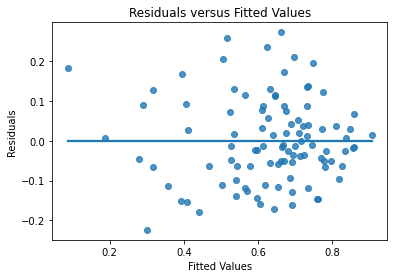

In [ ]:
sns.regplot(x=main_model.fittedvalues, y=main_model.resid, ci=False)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')
plt.show()

3. Normally Distributed Residuals and Mean of 0 Condition is roughly met. The histogram is roughly symmetrical, it is unimodal and centered at 0.

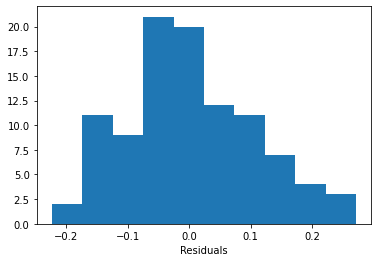

In [ ]:
plt.hist(main_model.resid)
plt.xlabel('Residuals')
plt.show()

4. Indipendence of residuals condition is met since the sample of songs from Spotify is random and n < 10% of all Spotify pop & rap songs, we know that this condition isn't violated in this particular way.
5. No multi-collinearity condition is met since the seven numerical explanatory variables do not have a strong linear relationship.

In [ ]:
df_songs[["danceability","key","loudness","acousticness","liveness","valence","mode"]].corr()

,danceability,key,loudness,acousticness,liveness,valence,mode
danceability,1.000000,-0.109311,0.016507,-0.153250,-0.059184,0.202401,-0.184378
key,-0.109311,1.000000,0.160955,0.099347,0.039049,0.164284,-0.203623
loudness,0.016507,0.160955,1.000000,-0.367057,0.210668,0.211313,0.037775
acousticness,-0.153250,0.099347,-0.367057,1.000000,0.054852,0.082738,0.078405
liveness,-0.059184,0.039049,0.210668,0.054852,1.000000,0.080681,0.108280
valence,0.202401,0.164284,0.211313,0.082738,0.080681,1.000000,-0.089080
mode,-0.184378,-0.203623,0.037775,0.078405,0.108280,-0.089080,1.000000


In [ ]:
sns.pairplot(df_songs[["danceability","key","loudness","acousticness","liveness","valence","mode"]])

Research Question Answers

1. We will check if there a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in the sample.

Method 1: $R^2$ Assessment
The $R^2$ for this model is .683 which is a pretty decent fit.

Method 2: Linearity Condition Checking
The linearity condition is met. In the Fitted values vs Residual plot you can see that as we move from left to right the points are equally distributed above and below the line.


2. We would like to determine if there is sufficient evidence to suggest that there is a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in all spotify rap and pop songs.

Hypothesis:

$H_0$: $\beta_1=\beta_2=\beta_3=\beta_4=\beta_5=\beta_6=\beta_7=\beta_8=0$

$H_A$: at least one $\beta_i \neq 0$ for $i=1,2,3,4,5,6,7,8$

1. $\beta_1=$ the population slope corresponding to danceability
2. $\beta_2=$ the population slope corresponding to key
3. $\beta_3=$ the population slope corresponding to loudness
4. $\beta_4=$ the population slope corresponding to acousticness
5. $\beta_5=$ the population slope corresponding to liveness
6. $\beta_6=$ the population slope corresponding to valence
7. $\beta_7=$ the population slope corresponding to mode
8. $\beta_8=$ the population slope corresponding to genre

Test Statistic and p-value

From the summary table we can see
1. test statistic = 24.48
2. p-value = 1.21e-19

Conclusion

Using a significance level of $\alpha = 0.5$, we will make a conclusion about the hypothesis.

Because the p-value = 1.21e-19 < $\alpha = 0.5$, we reject the null hypothesis. Thus, there is sufficent evidence to suggest at least one of the slopes in the corresponding population model is non-zero. This indicates that there is a linear relationship between energy and danceability, key, loudness, acousticness, liveness, valence, mode and genre in all spotify rap and pop songs.

3. Since we already checked to see if there is a linear relationsip between energy and the explanatory variables, lets now check which explanatory variables have sufficient evidence to suggest linear association with song energy in all spotify rap and pop songs?

Hypothesis:

$H_0$: $\beta_1=0$

$H_A$: $\beta_1 \neq 0$

Because the p-value = .607 > $\alpha = 0.5$, we fail to reject the null hypothesis.

$H_0$: $\beta_2=0$

$H_A$: $\beta_2 \neq 0$

Because the p-value = 0.001 < $\alpha = 0.5$, we reject the null hypothesis.

$H_0$: $\beta_3=0$

$H_A$: $\beta_3 \neq 0$

Because the p-value = .419 > $\alpha = 0.5$, we failt to reject the null hypothesis.

$H_0$: $\beta_4=0$

$H_A$: $\beta_4 \neq 0$

Because the p-value < 0.0001 < $\alpha = 0.5$, we reject the null hypothesis.

$H_0$: $\beta_5=0$

$H_A$: $\beta_5 \neq 0$

Because the p-value < 0.0001 < $\alpha = 0.5$, we reject the null hypothesis.

$H_0$: $\beta_6=0$

$H_A$: $\beta_6 \neq 0$

Because the p-value = .591 > $\alpha = 0.5$, we fail to reject the null hypothesis.

$H_0$: $\beta_7=0$

$H_A$: $\beta_7 \neq 0$

Because the p-value < 0.0001 < $\alpha = 0.5$, we reject the null hypothesis.

$H_0$: $\beta_8=0$

$H_A$: $\beta_8 \neq 0$

Because the p-value = .647 > $\alpha = 0.5$, we fail to reject the null hypothesis.

Conclusion

We have sufficent evidence to suggest that the slopes for danceability, loudness, acousticness, and valence in the population model are non-zero. We do not have sufficient evidence to suggest that the slope for Genre[T.Rap], key, liveness and mode are non-zero in the population model.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 5. Logistic Regression

**Research Question 1: **

For this section, our group wanted to first explore the relationship between genre and 4 explanatory variables we selected. The 4 explanatory variables we selected were speechiness, danceability, acousticness, and liveness. 

Our goal with this question was to build a parsimonious model using only the variables we should include. We chose these 4 variables beause we assumed it would fit the most in predicting 

In [ ]:
df_songs['y'] = df_songs.Genre.map({'Rap': 1, 'Pop': 0})
df_songs

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular,y
0,0,3nvq7dUw9ISmhtrjBrSfOE,hellboy,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,08VSO0uoR2SaKrxcFoJ235,HELLBOY,2016,65,135.982,...,0.3190,0.1220,0.0,0.0540,audio_features,5.0,Rap,2016,0,1
1,1,6GivWRmlYtefJr28jev6e0,Leray,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,0tKX7BLXiiRgXUKYdJzjEz,A Love Letter To You 4,2019-11-22,70,132.847,...,0.1090,0.3690,1.0,0.0870,audio_features,4.0,Rap,2019,1,1
2,2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,...,0.1430,0.4100,1.0,0.0555,audio_features,4.0,Rap,2015,0,1
3,3,3BYIzNZ3t9lRQCACXSMLrT,Venetia,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,7IyoGB8J31fvQDwGtHAq9m,Eternal Atake,2020-03-06,62,142.933,...,0.1480,0.5620,1.0,0.1750,audio_features,4.0,Rap,2020,0,1
4,4,496GZe7MxLloHgUQTmY2Ch,$Outh $Ide $Uicide,1VPmR4DJC1PlOtd0IADAO0,$uicideboy$,7gMzKwKAsbooGeKgDlX2TL,High Tide in the Snake's Nest,2015-06-15,71,109.993,...,0.0728,0.0478,1.0,0.0832,audio_features,4.0,Rap,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,2Nz6aF1umHh5Et6I5H581L,Hooked On A Feeling,0UpuH5U4nZ3UGGUJi0Zfbp,Blue Swede,12UILuDVbIIjLZhcRBNcOJ,Hooked On A Feeling - 40th Anniversary Collection,2014-09-30,65,118.208,...,0.3000,0.9330,1.0,0.0805,audio_features,4.0,Pop,2014,0,0
96,46,14kYOiFVPb7E7NfFbqhdln,goodnight n go,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,3tx8gQqWbGwqIGZHqDNrGe,Sweetener,2018-08-17,69,110.963,...,0.0730,0.2400,1.0,0.0395,audio_features,4.0,Pop,2018,1,0
97,47,76VtA90NKurNqaQpV126Ue,Pour It Up,5pKCCKE2ajJHZ9KAiaK11H,Rihanna,4eddbruVtOqw8khwxSH6H2,Unapologetic (Deluxe),2012-12-11,67,134.002,...,0.0901,0.3900,1.0,0.0419,audio_features,4.0,Pop,2012,1,0
98,48,5dMKsEQSlR2ITYpScl7UMd,Remember This,6fOMl44jA4Sp5b9PpYCkzz,NF,1KOmHyNLuOe5YrPhD3Juuf,Perception,2017-10-06,67,79.196,...,0.1090,0.2780,1.0,0.2060,audio_features,4.0,Pop,2017,1,0


In [ ]:
training_data, testing_data = train_test_split(df_songs, test_size=0.5, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 50
No. of testing examples: 50


In [ ]:
training_data.head(5)

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,liveness,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular,y
70,20,1qrpoAMXodY6895hGKoUpA,You Belong With Me (Taylor’s Version),06HL4z0CvFAxyc27GXpf02,Taylor Swift,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,80,130.033,...,0.0885,0.474,1.0,0.0346,audio_features,4.0,Pop,2021,1,0
5,5,2v5JTeM6hSmi5wWy7jiwrI,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,2kCcBybjl3SAtIcwdWpUe3,Lil Peep,4BQUTZlR3OMrBorJo1ahoY,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,2019-01-31,66,129.939,...,0.1740,0.926,0.0,0.0381,audio_features,4.0,Rap,2019,1,1
2,2,3I8MbKRkS2IBDuslhCS3iT,Excuse Me,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,3arNdjotCvtiiLFfjKngMc,AT.LONG.LAST.A$AP,2015-05-26,61,122.040,...,0.1430,0.410,1.0,0.0555,audio_features,4.0,Rap,2015,0,1
52,2,1dNIEtp7AY3oDAKCGg2XkH,Something Just Like This,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,7IzpJkWQqgz1BTutQvSitX,Something Just Like This,2017-02-22,74,102.996,...,0.1740,0.505,0.0,0.0362,audio_features,4.0,Pop,2017,1,0
38,38,6nQ1B216Liiydhgn2gar0o,Material Girl,2NfwGBr2swqZ1rzE3kAV23,Saucy Santana,1bdjA6LpTF8vkWLK983MRx,Imma Celebrity,2020-01-14,65,101.995,...,0.5420,0.433,1.0,0.2820,audio_features,4.0,Rap,2020,0,1


We picked speechiness sice rap music tends to have a lot of words, danceability since we believed that pop songs would have more danceability, acousticness, and liveness since pop music tends to be performed live more and put on spotify, and pop songs tend to have more acoustic instrumental versus a more computer based background for rap music.

In [ ]:
current_model = smf.logit('y~speechiness+danceability+acousticness+liveness', data = training_data).fit()
print("Iteration 1: BIC= ", current_model.bic)
training_data.columns

Optimization terminated successfully.
         Current function value: 0.544672
         Iterations 6
Iteration 1: BIC=  74.02732391632591


Index(['index', 'track_id', 'track_name', 'artist_id', 'artist_name',
       'album_id', 'album_name', 'release_date', 'popularity', 'tempo',
       'danceability', 'energy', 'key', 'loudness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'mode', 'speechiness',
       'type', 'time_signature', 'Genre', 'release_year', 'Popular', 'y'],
      dtype='object')

In [ ]:
test_model = smf.logit('y~speechiness+danceability+acousticness', data = training_data).fit()
print("BIC removing instrumentalness", test_model.bic)
test_model = smf.logit('y~instrumentalness+danceability+acousticness', data = training_data).fit()
print("BIC removing speechiness", test_model.bic)
test_model = smf.logit('y~instrumentalness+speechiness+acousticness', data = training_data).fit()
print("BIC removing danceability", test_model.bic)
test_model = smf.logit('y~instrumentalness+speechiness+danceability', data = training_data).fit()
print("BIC removing acousticness", test_model.bic)

Optimization terminated successfully.
         Current function value: 0.544839
         Iterations 6
BIC removing instrumentalness 70.13200958404512
Optimization terminated successfully.
         Current function value: 0.546460
         Iterations 6
BIC removing speechiness 70.29408031621428
Optimization terminated successfully.
         Current function value: 0.658630
         Iterations 5
BIC removing danceability 81.51109105824854
Optimization terminated successfully.
         Current function value: 0.547821
         Iterations 6
BIC removing acousticness 70.43020920813724


In [ ]:
current_model = smf.logit('y~speechiness+danceability+acousticness', data = training_data).fit()
print("Iteration 2: BIC= ", current_model.bic)

Optimization terminated successfully.
         Current function value: 0.544839
         Iterations 6
Iteration 2: BIC=  70.13200958404512


In [ ]:
test_model = smf.logit('y~danceability+acousticness', data = training_data).fit()
print("Without Speechiness BIC:", test_model.bic)
test_model = smf.logit('y~speechiness+acousticness', data = training_data).fit()
print("Without Speechiness BIC:", test_model.bic)
test_model = smf.logit('y~danceability+speechiness', data = training_data).fit()
print("Without Speechiness BIC:", test_model.bic)

Optimization terminated successfully.
         Current function value: 0.546543
         Iterations 6
Without Speechiness BIC: 66.39041288166963
Optimization terminated successfully.
         Current function value: 0.660250
         Iterations 5
Without Speechiness BIC: 77.76108933578288
Optimization terminated successfully.
         Current function value: 0.547848
         Iterations 6
Without Speechiness BIC: 66.52088308396714


In [ ]:
current_model = smf.logit('y~danceability+acousticness', data = training_data).fit()
print("Iteration 3: BIC= ", current_model.bic)

Optimization terminated successfully.
         Current function value: 0.546543
         Iterations 6
Iteration 3: BIC=  66.39041288166963


In [ ]:
test_model = smf.logit('y~acousticness', data = training_data).fit()
print("Without Danceability BIC:", test_model.bic)
test_model = smf.logit('y~danceability', data = training_data).fit()
print("Without Acousticness BIC:", test_model.bic)

Optimization terminated successfully.
         Current function value: 0.679231
         Iterations 4
Without Danceability BIC: 75.74718610722289
Optimization terminated successfully.
         Current function value: 0.549906
         Iterations 6
Without Acousticness BIC: 62.81461516437763


In [ ]:
final_model = smf.logit('y~danceability', data = training_data).fit()
final_model.summary()

Optimization terminated successfully.
         Current function value: 0.549906
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.1917
Time:                        05:15:52   Log-Likelihood:                -27.495
converged:                       True   LL-Null:                       -34.015
Covariance Type:            nonrobust   LLR p-value:                 0.0003051
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.7501      1.674     -2.837      0.005      -8.032      -1.469
danceability     7.7203      2.504      3.083      0.002       2.812      12.629
================================================================================
"""

After going through 3 iterations of backwards elimination, we landed on danceability as our main indicator to predict Genre.


ln(yhat/(1-yhat)) = -4.7501 + 7.7203*danceability

In [ ]:
fprs, tprs, thresholds = roc_curve(y_true = testing_data['y'], y_score = final_model.fittedvalues)
auc = roc_auc_score(y_true = testing_data['y'], y_score = final_model.fittedvalues)
auc

0.5788177339901477

Our ROC AUC was 0.579 which tells us that just danceability, while it may have been the optimal regression choice with the backwards elimination algorithm, doesn’t predict much more accurately than guessing. Our research doesn’t have any negative impacts from improper classification so going with a more lenient predictive probability threshold of 0.4 works for our dataset, since the classification of our model wasn’t as accurate as we would have hoped.


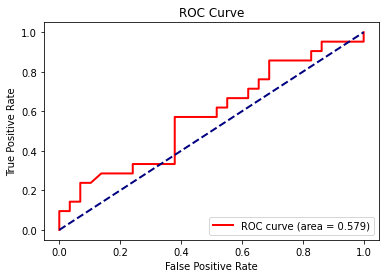

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color = 'red', lw=lw,
            label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

plot_roc(fprs, tprs, auc)

In [ ]:
pred_prob = final_model.predict(exog=dict(testing_data))
testing_data['pred_prob'] = pred_prob
testing_data

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,valence,mode,speechiness,type,time_signature,Genre,release_year,Popular,y,pred_prob
41,41,6xkGxJq5eFkbMvbaKLbXXo,"¿Quién Soy Yo? feat. Funky, Pichie T7",0WI8OfWCRvK4nGHmKfFQmd,Alex Zurdo,1pCerIsYh2FLhuvlf3Qz8r,¿Quién Soy Yo?,2019-11-18,46,94.998,...,0.4440,0.0,0.0398,audio_features,4.0,Rap,2019,0,1,0.616921
29,29,4rhr8LgQoPtWkQaXVPSNOO,numb the pain,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,3hn46RDrEmoi4XhLjgdNjZ,Bad Vibes Forever,2019-12-06,61,93.186,...,0.7400,0.0,0.0320,audio_features,4.0,Rap,2019,0,1,0.627807
33,33,2s2lJTRmW2k18lvfxPxcfp,Baby Boomer,2YHPVKeJcX02OyeNneU5v3,XANAKIN SKYWOK,3FeetjmtNFpbl24KnbHHyC,Baby Boomer,2019-07-09,34,99.970,...,0.2340,0.0,0.0594,audio_features,4.0,Rap,2019,0,1,0.836791
65,15,7fQmffdxTktq0sJFvRUcwE,Vacation,0VIiIxTNLeJOPoMLabwNtr,Florist,6F4S4TL7KECkwJkMD9ziCW,Holdly,2015-10-30,54,107.605,...,0.1120,1.0,0.0346,audio_features,4.0,Pop,2015,0,0,0.499460
74,24,2kSoq79VBHXG46PfHMpErb,It's a Marshmallow World,1Jqk46QvzUn7SnwmTGX6Cw,Jo Stafford,5WksWns07oPp5qwA9MCGGB,It Had to Be You: Lost Radio Recordings,2017-08-11,60,136.444,...,0.7700,1.0,0.0538,audio_features,4.0,Pop,2017,0,0,0.491740
6,6,7vxLj7MREliG5i5vSnqSVr,Body,57LYzLEk2LcFghVwuWbcuS,Summer Walker,1qgJNWnPIeK9rx7hF8JCPK,Over It,2019-10-04,70,137.875,...,0.3390,0.0,0.1670,audio_features,4.0,Rap,2019,1,1,0.385711
57,7,0Sbeihd75SGitymHS8Bqbh,I Hate Love Songs,3RqBeV12Tt7A8xH3zBDDUF,Kelsea Ballerini,7Ht6xQ80vFtSe2n2KjAAsA,Unapologetically (Deluxe Edition),2018-10-26,56,179.995,...,0.4000,1.0,0.0297,audio_features,3.0,Pop,2018,0,0,0.145529
89,39,44kI7aJvJAYJkREVk0Rmei,Confieso,69UypehHabb68utzfjAVlV,Kany García,4HqL9DDTbrqBUFb6Pswcki,Soy Yo,2018-05-18,73,177.688,...,0.3600,1.0,0.0997,audio_features,4.0,Pop,2018,1,0,0.254400
87,37,0v4z1tuZvn6LGknom9Qx7d,Babe (Taylor's Version) (From The Vault),06HL4z0CvFAxyc27GXpf02,Taylor Swift,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,70,167.844,...,0.7460,1.0,0.0931,audio_features,4.0,Pop,2021,1,0,0.439919
98,48,5dMKsEQSlR2ITYpScl7UMd,Remember This,6fOMl44jA4Sp5b9PpYCkzz,NF,1KOmHyNLuOe5YrPhD3Juuf,Perception,2017-10-06,67,79.196,...,0.2780,1.0,0.2060,audio_features,4.0,Pop,2017,1,0,0.417235


In [ ]:
final = testing_data
final['yhat'] = 1*(testing_data['pred_prob'] > 0.579)
final

,index,track_id,track_name,artist_id,artist_name,album_id,album_name,release_date,popularity,tempo,...,mode,speechiness,type,time_signature,Genre,release_year,Popular,y,pred_prob,yhat
41,41,6xkGxJq5eFkbMvbaKLbXXo,"¿Quién Soy Yo? feat. Funky, Pichie T7",0WI8OfWCRvK4nGHmKfFQmd,Alex Zurdo,1pCerIsYh2FLhuvlf3Qz8r,¿Quién Soy Yo?,2019-11-18,46,94.998,...,0.0,0.0398,audio_features,4.0,Rap,2019,0,1,0.616921,1
29,29,4rhr8LgQoPtWkQaXVPSNOO,numb the pain,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,3hn46RDrEmoi4XhLjgdNjZ,Bad Vibes Forever,2019-12-06,61,93.186,...,0.0,0.0320,audio_features,4.0,Rap,2019,0,1,0.627807,1
33,33,2s2lJTRmW2k18lvfxPxcfp,Baby Boomer,2YHPVKeJcX02OyeNneU5v3,XANAKIN SKYWOK,3FeetjmtNFpbl24KnbHHyC,Baby Boomer,2019-07-09,34,99.970,...,0.0,0.0594,audio_features,4.0,Rap,2019,0,1,0.836791,1
65,15,7fQmffdxTktq0sJFvRUcwE,Vacation,0VIiIxTNLeJOPoMLabwNtr,Florist,6F4S4TL7KECkwJkMD9ziCW,Holdly,2015-10-30,54,107.605,...,1.0,0.0346,audio_features,4.0,Pop,2015,0,0,0.499460,0
74,24,2kSoq79VBHXG46PfHMpErb,It's a Marshmallow World,1Jqk46QvzUn7SnwmTGX6Cw,Jo Stafford,5WksWns07oPp5qwA9MCGGB,It Had to Be You: Lost Radio Recordings,2017-08-11,60,136.444,...,1.0,0.0538,audio_features,4.0,Pop,2017,0,0,0.491740,0
6,6,7vxLj7MREliG5i5vSnqSVr,Body,57LYzLEk2LcFghVwuWbcuS,Summer Walker,1qgJNWnPIeK9rx7hF8JCPK,Over It,2019-10-04,70,137.875,...,0.0,0.1670,audio_features,4.0,Rap,2019,1,1,0.385711,0
57,7,0Sbeihd75SGitymHS8Bqbh,I Hate Love Songs,3RqBeV12Tt7A8xH3zBDDUF,Kelsea Ballerini,7Ht6xQ80vFtSe2n2KjAAsA,Unapologetically (Deluxe Edition),2018-10-26,56,179.995,...,1.0,0.0297,audio_features,3.0,Pop,2018,0,0,0.145529,0
89,39,44kI7aJvJAYJkREVk0Rmei,Confieso,69UypehHabb68utzfjAVlV,Kany García,4HqL9DDTbrqBUFb6Pswcki,Soy Yo,2018-05-18,73,177.688,...,1.0,0.0997,audio_features,4.0,Pop,2018,1,0,0.254400,0
87,37,0v4z1tuZvn6LGknom9Qx7d,Babe (Taylor's Version) (From The Vault),06HL4z0CvFAxyc27GXpf02,Taylor Swift,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,70,167.844,...,1.0,0.0931,audio_features,4.0,Pop,2021,1,0,0.439919,0
98,48,5dMKsEQSlR2ITYpScl7UMd,Remember This,6fOMl44jA4Sp5b9PpYCkzz,NF,1KOmHyNLuOe5YrPhD3Juuf,Perception,2017-10-06,67,79.196,...,1.0,0.2060,audio_features,4.0,Pop,2017,1,0,0.417235,0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = final['y'], 
                                 y_pred = final['yhat']).ravel()
(tn, fp, fn, tp)
false_positive_rate = fp/(tn+fp)
print(false_positive_rate)
true_positive_rate = tp/(fn+tp)
print(true_positive_rate)

0.41379310344827586
0.5238095238095238


Our model was parsimonious through backwards elimination, but its predictive ability to use the 4 variables we picked to predict Genre was slightly above average.

Research question answers:
We determined that the parsimonious variable to predict Genre was danceability.


**Research Question 2:**

**Conditions**

Independence of Observations:
- The sample is randomly selected from the population
- The sample size is less than 10% of the population

Thus, this condition is met.

Linearity Condition: 


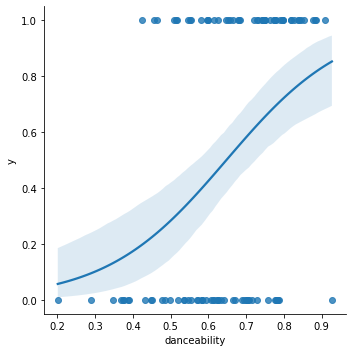

In [ ]:
sns.lmplot(x = "danceability", y = "y" ,data=df_songs, logistic=True)
plt.show()

Since the plot follows the S-shape curve, this condition is met.

No Multi-Colinearity Condition

Since we only used one variable for our final logistic model there is no way to check for multi-colinearity, thus this condition is N/A.

**Confidence Interval**

In [ ]:
pe = 7.7203
se = 2.504

In [ ]:
c_val = norm.ppf(0.995)
c_val

2.5758293035489004

In [ ]:
l_bound = pe - c_val*se
l_bound

1.2704234239135532

In [ ]:
u_bound = pe + c_val*se
u_bound

14.170176576086448

We are 99% confident that the odds multiplier for danceability in the population logistic regression model is within the interval: (1.27, 14.17).

**Hypothesis Test**

Ho: ß7 = 0

Ha: ß7 != 0

ß7: slope for danceability

**Test Statistic**

In [ ]:
t_stat = pe/se
t_stat

3.0831869009584665

In [ ]:
pval = 2*(1- norm.cdf(np.abs(t_stat)))
pval

0.0020479648828728436

**Conclustion with p-value for hypothesis test 1:**

Since the p-value is less than the significance level (0.01), we must reject the null hypothesis. Therefore, there is enough evidence to support that the slope for danceability is non-zero in the logistic population model.

Ho: e^ß7 = 1

Ha: e^ß7 != 1

ß7: slope for danceability
e^ß7: odds multiplier for danceability

**Conclusion with p-value for hypothesis test 2:**

Since the p-value is less than the significance level (0.01), we must reject the null hypothesis. Therefore, there is enough evidence to support that the odds multiplier for danceability is not equal to 1.

**Conclusion for Research Question 2:**

There is a linear relationship between the log-odds of the success level of genre and danceability in the population of all pop and rap songs from 2011 to 2021.

## 6. Conclusion

Summary

Descriptive Analysis:

Inference:

Through our inference section we were able to determine if there was an association between the genre and the danceability of the song.  We ran a difference in population means hypothesis test to determine this and found that there is indeed an association. There is a difference in the average danceability for pop songs and the average danceability for rap songs in the population of pop and rap songs from 2011 to 2021. This finding helps us gain a little bit more of an understanding on music and the factors that play into its danceability.

Linear Regression:

The first research question for the linear regression section helped us determine if the model that predicted energy was linear for the sample. After checking both the R^2 and linearity condition we know for a fact that there is a linear relationship between energy and the other explanatory varaibles we chose. The second question helped me determine if there is a linear relationship for the entire population. For the hypothesis test we rejected the null hypothesis which meant at least one of the slopes was non-zero. The third question helped me determine which of the explanatory varaible's slopes were non-zero. It turns out the slopes for danceability, loudness, acousticness, and valence in the population model are non-zero.

Logistic Regression:

Future Work:

a. One particular question we were interested is what factors contribute to making a song popular besides the artists themselves. Unofrtunately given the current dataset there was no column that correlated with a song being popular. We would definitely be more interested in analyzing a bigger dataset with more explanatory varaibles. We could possibly track data over the years and develop charts to see what music people are listening to and enjoying. This could help us discover trends that help us decide what makes a song popular.

b. We believe there may be a shortcoming in our logistic regression modeling section. We encountered a problem in which barely any of the explanatory variables we selected passed through the backwards elimination algorithm and so we were left with only one explanatory variable to predict our response variable. This ultimately may have an impact on our answer to this research question but we are not sure if it does for sure or not. 